In [ ]:
read dataset

In [ ]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2021.csv')
exchange_rates.head()

In [ ]:
exchange_rates.tail()

In [ ]:
exchange_rates.info()

In [ ]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

In [ ]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

In [ ]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()


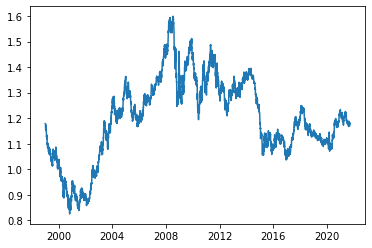

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

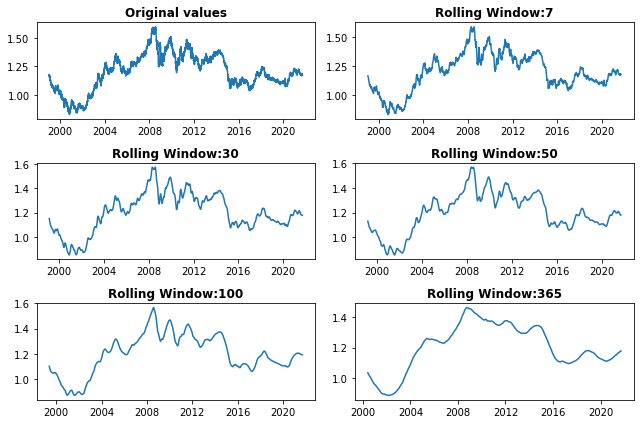

In [9]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [31]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5873,2021-09-14,1.1814,1.178560
5874,2021-09-15,1.1824,1.178437
5875,2021-09-16,1.1763,1.178147
5876,2021-09-17,1.1780,1.178057


In [11]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

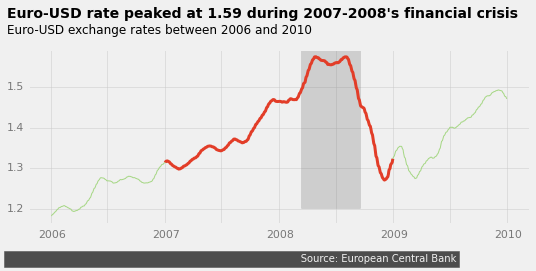

In [32]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, '' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

In [14]:
bush_obama_trump_biden = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year <= 2021)]
bush = bush_obama_trump_biden.copy(
       )[bush_obama_trump_biden['Time'].dt.year < 2009]
obama = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year >= 2009) & (bush_obama_trump_biden['Time'].dt.year < 2017)]
trump = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year >= 2017) & (bush_obama_trump_biden['Time'].dt.year < 2021)]
biden = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year == 2021)]

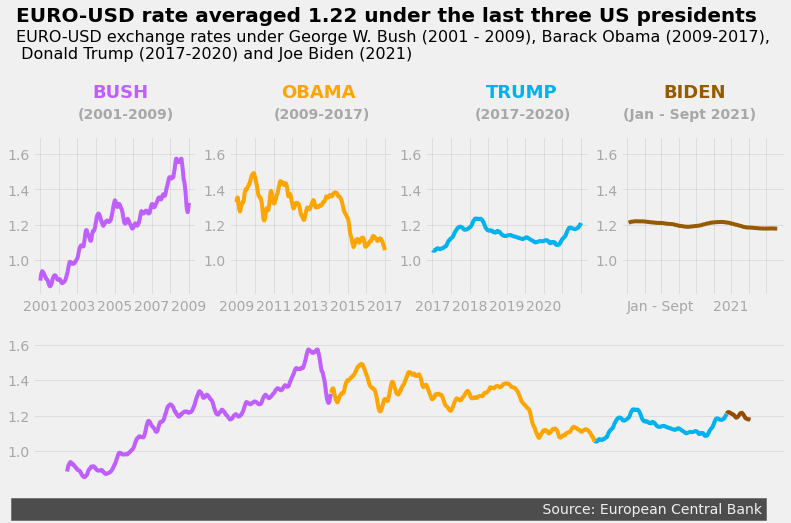

In [35]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4, ax5]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2020)', weight='bold',
         alpha=0.3)


### Ax4: BIDEN
ax4.plot(biden['Time'], biden['rolling_mean'],
        color='#965B00')
ax4.set_xticklabels(['', '', 'Jan - Sept', '', '', '', '2021'],
                   alpha=0.3)
ax4.text(737855.0, 1.92, 'BIDEN', fontsize=18, weight='bold',
        color='#965B00')
ax4.text(737785.0, 1.8, '(Jan - Sept 2021)', weight='bold',
         alpha=0.3)


### Ax5: Bush-Obama-Trump-Biden
ax5.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax5.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax5.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax5.plot(biden['Time'], biden['rolling_mean'],
        color='#964B00')
ax5.grid(alpha=0.5)
ax5.set_xticks([])

### Adding a title and a subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
 Donald Trump (2017-2020) and Joe Biden (2021)''',
        fontsize=16)

### Adding a signature
ax5.text(729916.0, 0.65, '              ' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()